# COVID19 with 100 World Countries

## 0. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sqlite3
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('Data.csv')

## 1. Exploratory Data Analysis and Cleaning

In [3]:
df.shape

(38472, 15)

In [4]:
df.head()

,Entity,Continent,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Date,Daily tests,Cases,Deaths
0,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,25/2/2020,8.0,NaN,NaN
1,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,26/2/2020,5.0,NaN,NaN
2,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,27/2/2020,4.0,NaN,NaN
3,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,28/2/2020,1.0,NaN,NaN
4,Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14,29/2/2020,8.0,NaN,NaN


In [5]:
df.columns

Index(['Entity', 'Continent', 'Latitude', 'Longitude',
       'Average temperature per year', 'Hospital beds per 1000 people',
       'Medical doctors per 1000 people', 'GDP/Capita', 'Population',
       'Median age', 'Population aged 65 and over (%)', 'Date', 'Daily tests',
       'Cases', 'Deaths'],
      dtype='object')

In [6]:
df.dtypes

Entity                              object
Continent                           object
Latitude                           float64
Longitude                          float64
Average temperature per year         int64
Hospital beds per 1000 people      float64
Medical doctors per 1000 people    float64
GDP/Capita                         float64
Population                           int64
Median age                           int64
Population aged 65 and over (%)      int64
Date                                object
Daily tests                        float64
Cases                              float64
Deaths                             float64
dtype: object

In [7]:
df.describe()

,Latitude,Longitude,Average temperature per year,Hospital beds per 1000 people,Medical doctors per 1000 people,GDP/Capita,Population,Median age,Population aged 65 and over (%),Daily tests,Cases,Deaths
count,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,38472.000000,3.847200e+04,38472.000000,38472.000000,3.057700e+04,3.821800e+04,34862.000000
mean,23.737060,20.210847,17.717145,3.165305,2.086313,19002.331415,4.896983e+07,32.751508,10.663392,3.944059e+04,2.879027e+05,8090.504733
std,26.060413,61.074922,8.134926,2.561767,1.518252,22271.107786,1.427251e+08,8.472305,6.770417,1.501847e+05,1.405243e+06,29548.753221
min,-40.900000,-106.350000,-2.000000,0.200000,0.020000,411.600000,3.412840e+05,16.000000,1.000000,-2.391720e+05,1.000000e+00,1.000000
25%,8.620000,-3.440000,11.000000,1.400000,0.820000,3659.000000,4.793900e+06,27.000000,5.000000,1.505000e+03,2.074000e+03,77.000000
50%,27.510000,21.820000,20.000000,2.500000,1.890000,8821.800000,1.148464e+07,32.000000,8.000000,5.520000e+03,2.143100e+04,527.000000
75%,45.940000,47.480000,25.000000,4.490000,3.210000,25946.200000,4.286296e+07,41.000000,16.000000,2.038200e+04,1.373770e+05,3480.500000
max,64.960000,179.410000,29.000000,13.050000,7.520000,114704.600000,1.339180e+09,48.000000,28.000000,2.945871e+06,2.860567e+07,513091.000000


In [8]:
# Re-typing "Date" column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [9]:
# Renaming columns for easier reference and use
df = df.rename(columns= {
    'Entity': 'Country',
    'Average temperature per year': 'AvgTemp',
    'Hospital beds per 1000 people': 'HospitalBeds',
    'Medical doctors per 1000 people': 'Doctors',
    'GDP/Capita': 'GDPPerCapita',
    'Median age': 'MedianAge',
    'Population aged 65 and over (%)': 'PctOver65',
    'Daily tests': 'DailyTests'
})

In [10]:
# Checking for null records
df.isna().sum()

Country            0
Continent          0
Latitude           0
Longitude          0
AvgTemp            0
HospitalBeds       0
Doctors            0
GDPPerCapita       0
Population         0
MedianAge          0
PctOver65          0
Date               0
DailyTests      7895
Cases            254
Deaths          3610
dtype: int64

In [11]:
# Checking for duplicates
df.loc[df.duplicated()]

,Country,Continent,Latitude,Longitude,AvgTemp,HospitalBeds,Doctors,GDPPerCapita,Population,MedianAge,PctOver65,Date,DailyTests,Cases,Deaths


In [12]:
# Replaceing null values with 0 and filtering for records with at least 1 daily test
df = df[df['DailyTests']>0].fillna(0)

In [13]:
# Understanding range of dates
df['Date'].agg(['min', 'max'])

min   2020-01-01
max   2021-02-26
Name: Date, dtype: datetime64[ns]

In [14]:
df['Country'].value_counts().head()

Mexico         421
Thailand       414
Switzerland    397
Argentina      396
Japan          384
Name: Country, dtype: int64

## 2. Exporting to normalised tables into SQLite3 DB

In [15]:
# Slicing DimCountries from df; adding CountryID column for easier reference
DimCountries = df.loc[:, 'Country':'PctOver65'].drop_duplicates()
DimCountries.set_index('Country', drop=True, inplace=True)
DimCountries.head()

,Continent,Latitude,Longitude,AvgTemp,HospitalBeds,Doctors,GDPPerCapita,Population,MedianAge,PctOver65
Country,,,,,,,,,,
Albania,Europe,41.15,20.17,14,2.89,1.29,5353.2,2873457,38,14
Algeria,Africa,28.03,1.66,25,1.90,1.83,3974.0,41318142,29,6
Argentina,South America,-38.42,-63.62,14,5.00,3.91,9912.3,44271041,31,11
Armenia,Europe,40.07,45.04,11,4.20,2.80,4622.7,2930450,35,11
Australia,Oceania,-25.27,133.78,22,3.84,3.50,55060.3,24598933,37,16


In [16]:
# Subsetting FactCovid from df
FactCovid = pd.concat([df['Country'], df.loc[:, 'Date':'Deaths']], axis=1)
FactCovid.index.name = 'RecordID'
FactCovid.head()

,Country,Date,DailyTests,Cases,Deaths
RecordID,,,,,
0,Albania,2020-02-25,8.0,0.0,0.0
1,Albania,2020-02-26,5.0,0.0,0.0
2,Albania,2020-02-27,4.0,0.0,0.0
3,Albania,2020-02-28,1.0,0.0,0.0
4,Albania,2020-02-29,8.0,0.0,0.0


In [17]:
# Importing into SQLite3 DB
conn = sqlite3.connect(':memory:')
DimCountries.to_sql(name='DimCountries', con=conn)
FactCovid.to_sql(name='FactCovid', con=conn)

30565

## 3. Generation of Data Visualisations

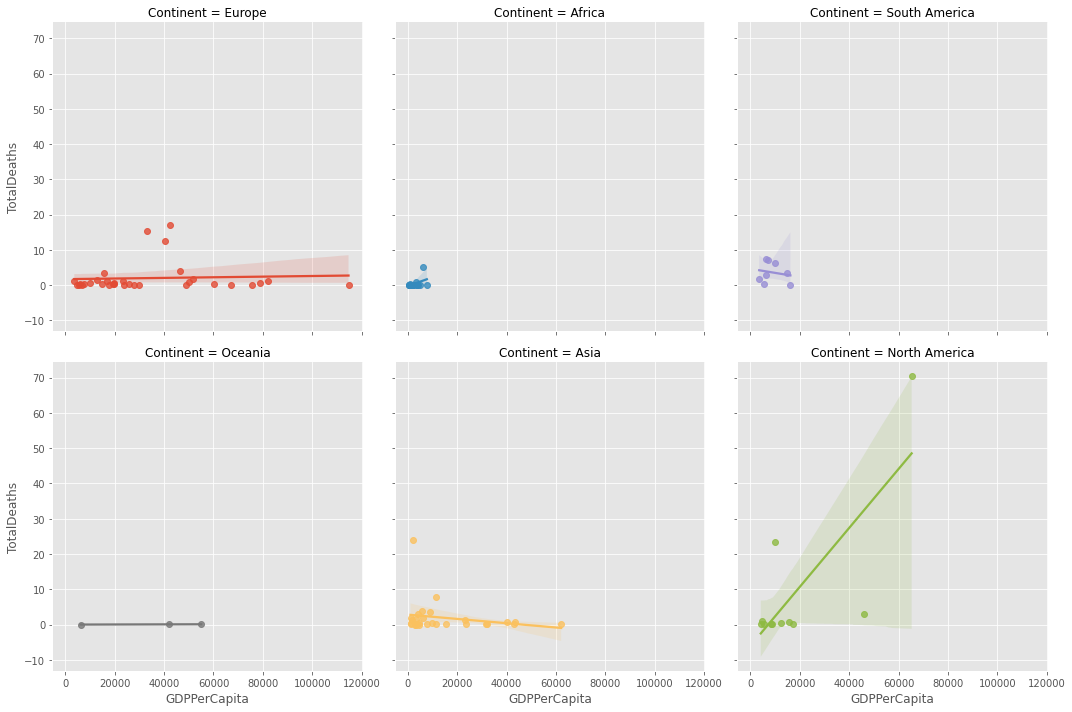

In [68]:
CorrMatrix = pd.read_sql('select d.Country, d.Continent, d.AvgTemp, d.GDPPerCapita, SUM(f.DailyTests) as TotalTests, SUM(f.Deaths) / 1000000 as TotalDeaths from DimCountries as d join FactCovid as f on d.Country = f.Country where f.Deaths > 0 group by d.Country' ,
                        conn)
dv1 = sns.lmplot(data=CorrMatrix,
          x='GDPPerCapita',
          y='TotalDeaths',
          col='Continent',
          hue='Continent',
          col_wrap=3)

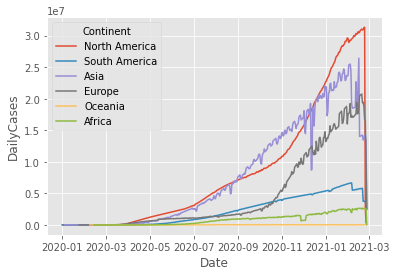

In [88]:
TimeData = pd.read_sql('select d.Continent, f.Date, SUM(f.Cases) as DailyCases from DimCountries as d join FactCovid as f on d.Country = f.Country group by f.date, d.Continent',
                      conn)
TimeData['Date'] = pd.to_datetime(TimeData['Date']).dt.normalize()

dv2 = sns.lineplot(data=TimeData, x='Date', y='DailyCases', hue='Continent')

<AxesSubplot:xlabel='Date', ylabel='DailyTests'>

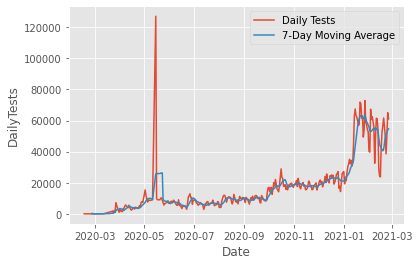

In [122]:
CovidMY = pd.read_sql('select Country, Date, DailyTests from FactCovid where Country = "Malaysia"', conn)
CovidMY['Date'] = pd.to_datetime(CovidUS['Date']).dt.normalize()
CovidMY['7DMA'] = CovidMY['DailyTests'].rolling(7).mean()

dv3 = sns.lineplot(data=CovidMY, x='Date', y='DailyTests', label='Daily Tests')
sns.lineplot(data=CovidMY, x='Date', y='7DMA', label='7-Day Moving Average')